### Sales Prediction 

### Importing the libraries and the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sales_df = pd.read_csv("Train.csv")






### Performing EDA

In [3]:
sales_df.head(15)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [4]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
print("Shape of the dataset: ",np.shape(sales_df))

Shape of the dataset:  (8523, 12)


### Exploring missing values

In [6]:
sales_df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:




# Calculating missing data  
total_missing = sales_df.isnull().sum().sort_values(ascending=False)
percent_missing = sales_df.isnull().sum()/sales_df.isnull().count().sort_values(ascending=False)
missing_data = pd.concat([total_missing,percent_missing], axis=1, keys=["Total","Percent missing"])

,Total,Percent missing
Outlet_Size,2410,0.282764
Item_Weight,1463,0.171653
Item_Outlet_Sales,0,0.000000
Outlet_Type,0,0.000000
Outlet_Location_Type,0,0.000000


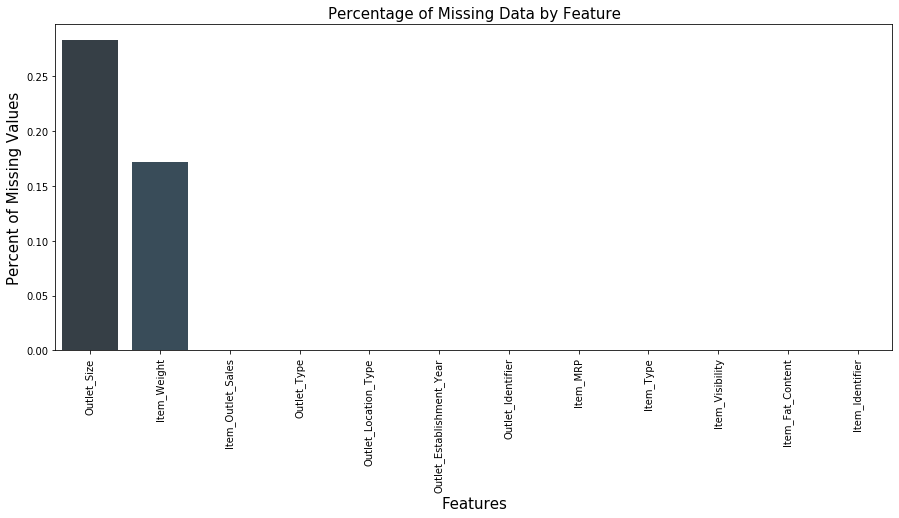

In [8]:
# Plotting the missing data
f,ax = plt.subplots(figsize=(15,6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent missing'],palette="Blues_d")
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of Missing Values', fontsize=15)
plt.title('Percentage of Missing Data by Feature', fontsize=15)
missing_data.head()

### Filling missing values for Outlet_Size and Item_Weight

#### Before filling missing values for Item_Weight, let us replace reg with Regular and LF with Low Fat in the Item_Identifier column 

In [9]:
print(sales_df['Item_Fat_Content'].unique())
sales_item = sales_df['Item_Fat_Content']
sales_item = sales_item.replace({"reg":"Regular","LF":"Low Fat","low fat":"Low Fat"})
print(sales_item.unique())
sales_df['Item_Fat_Content'] = sales_item

['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
['Low Fat' 'Regular']


In [10]:
sales_df["Item_Weight"] = sales_df["Item_Weight"].fillna(sales_df.groupby(['Item_Identifier','Item_Fat_Content','Item_Type'])['Item_Weight'].transform('mean'))

In [11]:
sales_df.isnull().sum()

Item_Identifier                 0
Item_Weight                     4
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [12]:
sales_df["Outlet_Size"].fillna(sales_df["Outlet_Size"].mode()[0],inplace=True)

In [13]:
sales_df.isnull().sum()

Item_Identifier              0
Item_Weight                  4
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

#### Considering that we have only 4 missing values in Item_weight, we can remove those rows

In [14]:
sales_df = sales_df.dropna()
sales_df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [15]:
print("Shape of dataset after dropping values: ",np.shape(sales_df))

Shape of dataset after dropping values:  (8519, 12)


### Before we encode categorical data, let us explore the correlation of independent variables wrt the target to remove certain columns
- This can be achieved by plotting a heatmap of correlation 

In [16]:
print("Statistical information of the dataset: \n",sales_df.describe())
print("Feature information of the dataset: \n",sales_df.info())

Statistical information of the dataset: 
        Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  8519.000000      8519.000000  8519.000000                8519.000000   
mean     12.875420         0.066112   141.010019                1997.837892   
std       4.646098         0.051586    62.283594                   8.369105   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.785000         0.026983    93.844900                1987.000000   
50%      12.650000         0.053925   143.047000                1999.000000   
75%      16.850000         0.094558   185.676600                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8519.000000  
mean         2181.188779  
std          1706.511093  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3100.630600  
max         13086.964800  
<cl

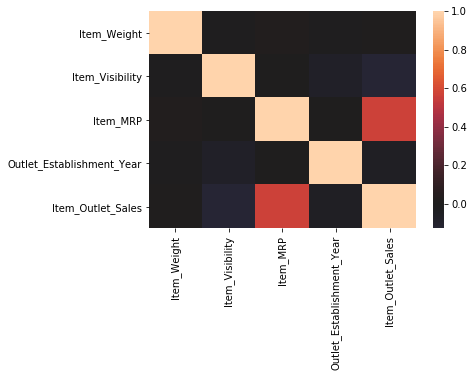

In [17]:
sns.heatmap(sales_df.corr(),center=0)

Text(0.5, 1.0, 'Scatterplot for Item Weight vs Item Outlet Sales')

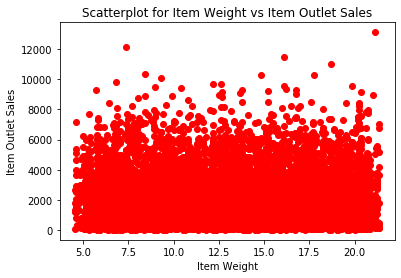

In [18]:
plt.scatter(x=sales_df["Item_Weight"],y=sales_df['Item_Outlet_Sales'],c='red')
plt.xlabel("Item Weight")
plt.ylabel("Item Outlet Sales")
plt.title("Scatterplot for Item Weight vs Item Outlet Sales")

Text(0.5, 1.0, 'Scatterplot for Item Visibility vs Item Outlet Sales')

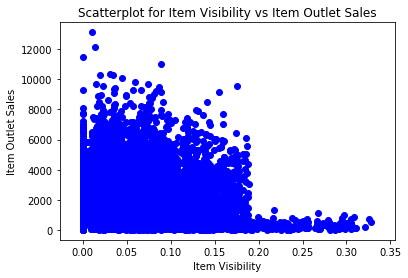

In [19]:
plt.scatter(x=sales_df["Item_Visibility"],y=sales_df['Item_Outlet_Sales'],c='blue')
plt.xlabel("Item Visibility")
plt.ylabel("Item Outlet Sales")
plt.title("Scatterplot for Item Visibility vs Item Outlet Sales")

Text(0.5, 1.0, 'Scatterplot for Item MRP vs Item Outlet Sales')

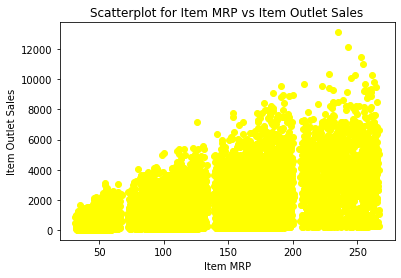

In [20]:
plt.scatter(x=sales_df["Item_MRP"],y=sales_df['Item_Outlet_Sales'],c='yellow')
plt.xlabel("Item MRP")
plt.ylabel("Item Outlet Sales")
plt.title("Scatterplot for Item MRP vs Item Outlet Sales")

Text(0.5, 1.0, 'Scatterplot for year of establishment vs Item Outlet Sales')

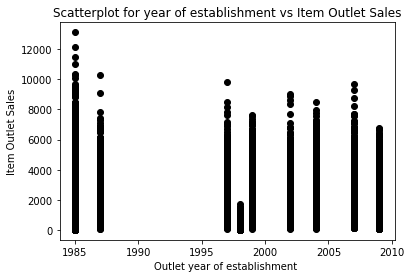

In [21]:
plt.scatter(x=sales_df["Outlet_Establishment_Year"],y=sales_df['Item_Outlet_Sales'],c='black')
plt.xlabel("Outlet year of establishment ")
plt.ylabel("Item Outlet Sales")
plt.title("Scatterplot for year of establishment vs Item Outlet Sales")

### As it's evident from the scatterplots, apart from Item_MRP, no other column is correlated to the target variable. Therefore, let us encode categorical data to see which columns influence the target


In [22]:
# Let us start with our Outlet_Size variable and Item_Fat_Content. Being ordinal is nature, we can use one Label Encoding
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
labelencoder = LabelEncoder()
sales_df["Outlet_Size"] = labelencoder.fit_transform(sales_df["Outlet_Size"])
sales_df["Item_Fat_Content"] = labelencoder.fit_transform(sales_df["Item_Fat_Content"])

In [23]:
sales_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,0,0.016047,Dairy,249.8092,OUT049,1999,1,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,0,0.016760,Meat,141.6180,OUT049,1999,1,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,0,0.000000,Household,53.8614,OUT013,1987,0,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,0,0.056783,Snack Foods,214.5218,OUT013,1987,0,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,1,0.046982,Baking Goods,108.1570,OUT045,2002,1,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,0,0.035186,Health and Hygiene,85.1224,OUT035,2004,2,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,1,0.145221,Snack Foods,103.1332,OUT018,2009,1,Tier 3,Supermarket Type2,1845.5976


In [24]:
sales_columns = ['Item_Type','Outlet_Location_Type','Outlet_Type']

In [25]:
# Let us now consider nominal data such as Item_Type, Outlet_Location_Type, and Outlet_Type
for feature in sales_columns:
    sales_df_temp = sales_df[feature]
    sales_df_temp = pd.get_dummies(sales_df_temp,columns=[feature],drop_first=True)
    sales_df = sales_df.join(sales_df_temp)

In [26]:
sales_df = sales_df.drop(['Item_Type','Outlet_Location_Type','Outlet_Type','Item_Identifier','Outlet_Identifier'],axis=1)

In [27]:
sales_df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Item_Outlet_Sales,Breads,Breakfast,Canned,...,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods,Tier 2,Tier 3,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,9.300,0,0.016047,249.8092,1999,1,3735.1380,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,5.920,1,0.019278,48.2692,2009,1,443.4228,0,0,0,...,0,0,0,1,0,0,1,0,1,0
2,17.500,0,0.016760,141.6180,1999,1,2097.2700,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,19.200,1,0.000000,182.0950,1998,1,732.3800,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,8.930,0,0.000000,53.8614,1987,0,994.7052,0,0,0,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,214.5218,1987,0,2778.3834,0,0,0,...,0,0,1,0,0,0,1,1,0,0
8519,8.380,1,0.046982,108.1570,2002,1,549.2850,0,0,0,...,0,0,0,0,0,1,0,1,0,0
8520,10.600,0,0.035186,85.1224,2004,2,1193.1136,0,0,0,...,0,0,0,0,0,1,0,1,0,0
8521,7.210,1,0.145221,103.1332,2009,1,1845.5976,0,0,0,...,0,0,1,0,0,0,1,0,1,0


In [28]:
sales_df['Item_Visibility'] = sales_df["Item_Visibility"].replace({0:np.mean(sales_df["Item_Visibility"])}) 
sales_df['Item_Visibility']

0       0.016047
1       0.019278
2       0.016760
3       0.066112
4       0.066112
          ...   
8518    0.056783
8519    0.046982
8520    0.035186
8521    0.145221
8522    0.044878
Name: Item_Visibility, Length: 8519, dtype: float64

### Splitting the dataset into dependent and independent variables and splitting into training and test set

In [29]:
target_data = sales_df['Item_Outlet_Sales']
sales_df = sales_df.drop(['Item_Outlet_Sales'],axis=1)

In [30]:
sales_df['Item_Sales'] = target_data
sales_df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Breads,Breakfast,Canned,Dairy,...,Seafood,Snack Foods,Soft Drinks,Starchy Foods,Tier 2,Tier 3,Supermarket Type1,Supermarket Type2,Supermarket Type3,Item_Sales
0,9.300,0,0.016047,249.8092,1999,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,3735.1380
1,5.920,1,0.019278,48.2692,2009,1,0,0,0,0,...,0,0,1,0,0,1,0,1,0,443.4228
2,17.500,0,0.016760,141.6180,1999,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,2097.2700
3,19.200,1,0.066112,182.0950,1998,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,732.3800
4,8.930,0,0.066112,53.8614,1987,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,214.5218,1987,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,2778.3834
8519,8.380,1,0.046982,108.1570,2002,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,549.2850
8520,10.600,0,0.035186,85.1224,2004,2,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1193.1136
8521,7.210,1,0.145221,103.1332,2009,1,0,0,0,0,...,0,1,0,0,0,1,0,1,0,1845.5976


In [31]:
X = sales_df.iloc[:,:-1]

In [32]:
Y = sales_df.iloc[:,-1]

#### Scaling the independent and dependent features

#### Before we scale the data, let us plot its distribution to see if its normally distributed or not

Text(0.5, 1.0, 'Plotting distribution of Item_weight')

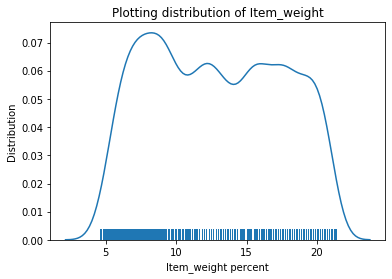

In [33]:
sns.distplot(X.iloc[:,0], hist=False, rug=True)
plt.xlabel('Item_weight percent')
plt.ylabel('Distribution')
plt.title('Plotting distribution of Item_weight')

Text(0.5, 1.0, 'Plotting distribution of Item_Visibility')

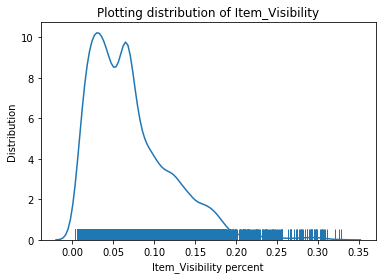

In [34]:
sns.distplot(X.iloc[:,2], hist=False, rug=True)
plt.xlabel('Item_Visibility percent')
plt.ylabel('Distribution')
plt.title('Plotting distribution of Item_Visibility')

Text(0.5, 1.0, 'Plotting distribution of Item_MRP')

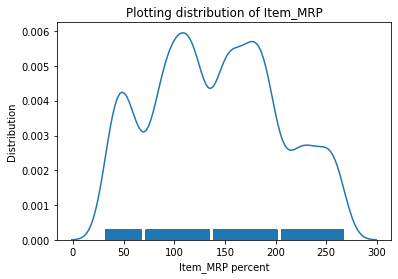

In [35]:
sns.distplot(X.iloc[:,3], hist=False, rug=True)
plt.xlabel('Item_MRP percent')
plt.ylabel('Distribution')
plt.title('Plotting distribution of Item_MRP')

Text(0.5, 1.0, 'Plotting distribution of Year')

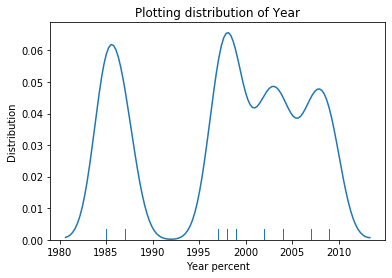

In [36]:
sns.distplot(X.iloc[:,4], hist=False, rug=True)
plt.xlabel('Year percent')
plt.ylabel('Distribution')
plt.title('Plotting distribution of Year')

### Visualising as a pairplot

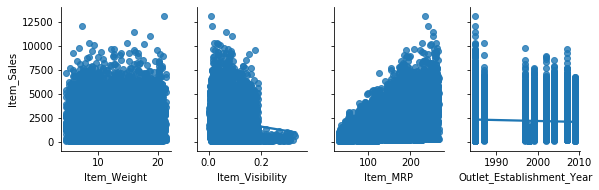

In [37]:
sns.pairplot(sales_df, x_vars=['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year'], y_vars=['Item_Sales'],
              aspect=0.8, kind="reg")

#### Since the data is not normally distributed, we can use Standardization for scaling instead of Normalization

In [38]:
Y = np.array(Y)
Y = Y.reshape(len(Y),1)

In [39]:
from sklearn.preprocessing import StandardScaler
scaler_X = StandardScaler()
scaler_Y = StandardScaler()

In [40]:
X.iloc[:,[0,2,3,4]] = scaler_X.fit_transform(X.iloc[:,[0,2,3,4]])

In [41]:
Y = scaler_Y.fit_transform(Y)

In [42]:
Y = pd.Series(Y.flatten())

In [43]:
print("X after scaling:\n",X,"\nY after scaling:\n",Y)

X after scaling:
       Item_Weight  Item_Fat_Content  Item_Visibility  Item_MRP  \
0       -0.769598                 0        -1.111258  1.746938   
1       -1.497133                 1        -1.044950 -1.489096   
2        0.995427                 0        -1.096630  0.009762   
3        1.361347                 1        -0.083776  0.659682   
4       -0.849240                 0        -0.083776 -1.399305   
...           ...               ...              ...       ...   
8518    -1.293725                 0        -0.275234  1.180344   
8519    -0.967626                 1        -0.476378 -0.527506   
8520    -0.489777                 0        -0.718470 -0.897362   
8521    -1.219465                 1         1.539759 -0.608170   
8522     0.414260                 0        -0.519562 -1.052394   

      Outlet_Establishment_Year  Outlet_Size  Breads  Breakfast  Canned  \
0                      0.138865            1       0          0       0   
1                      1.333806        

In [44]:
from sklearn.model_selection import train_test_split as tts
X_train,X_test,Y_train,Y_test = tts(X,Y,test_size = 0.25, random_state=0)

### Let us now build our regression model

In [45]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train,Y_train)

In [46]:
Y_pred = reg.predict(X_test)
Y_pred

array([-0.54785161,  0.10326315, -0.32656821, ..., -0.90688205,
       -0.7020955 ,  0.12453942])

In [47]:
print(reg.coef_)
reg.intercept_

[-3.60840891e-03  2.86130816e-02 -1.78590955e-03  5.59084072e-01
  2.33954934e-02  1.36472799e-02  1.46531724e-02  8.43002817e-02
  1.70117632e-02 -3.57266511e-02 -1.63867420e-02  2.78446765e-02
 -8.32107322e-04 -9.96509224e-03  1.52313708e-02 -2.86424935e-02
 -1.67158205e-02  6.34476642e-02  3.69266808e-03  6.96078362e-03
 -9.54825396e-03 -2.89815893e-02  3.13676639e-02  1.15900141e+00
  9.02783126e-01  1.96859791e+00]


-1.1100047120519636

In [48]:
from sklearn.metrics import mean_squared_error, r2_score
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
r2 = r2_score(Y_test, Y_pred)

In [49]:
print("RMSE: ",rmse,"\nR2 score: ",r2)

RMSE:  0.6752006468025024 
R2 score:  0.5641181377273178


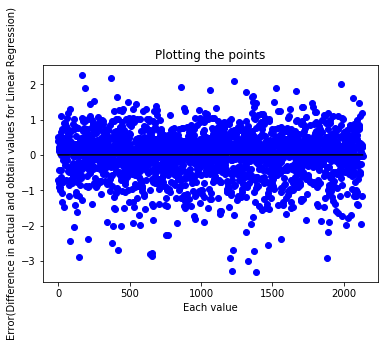

In [50]:
x = [i for i in range(1,len(Y_pred)+1)]

X_plot = plt.scatter(x,(Y_pred-Y_test),c='b')
plt.plot(x,[0]*len(Y_pred),c='black')
plt.xlabel("Each value")
plt.ylabel("Error(Difference in actual and obtain values for Linear Regression)")
plt.title("Plotting the points")
plt.show()

### Regularization techniques

In [51]:
predictors = X_train.columns

In [52]:
coef = pd.Series(reg.coef_,predictors).sort_values()

Text(0, 0.5, 'coefficients')

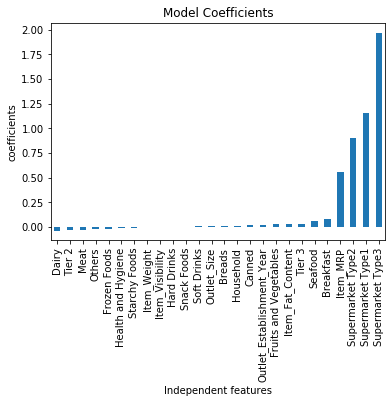

In [53]:
coef.plot(kind='bar',title='Model Coefficients')
plt.xlabel("Independent features")
plt.ylabel("coefficients")

### Ridge regression

In [54]:
from sklearn.linear_model import Ridge

In [55]:
ridge = Ridge(alpha=0.05,normalize=True).fit(X_train,Y_train)
Y_pred_ridge = ridge.predict(X_test)

In [56]:
print("Ridge coefficient: ",ridge.coef_)
print("\nRidge intercept: ",ridge.intercept_)

Ridge coefficient:  [-0.003244    0.02899128 -0.02269716  0.5322577   0.04064048 -0.02657737
  0.01846712  0.08086892  0.02147418 -0.02887569 -0.01213482  0.03348479
  0.00530689 -0.01599262  0.01548961 -0.03121615 -0.02319988  0.06287743
  0.00860735  0.00538986  0.00276175 -0.00662742  0.01882077  0.9120246
  0.63824709  1.70418835]

Ridge intercept:  -0.849201656660975


In [57]:
rmse_ridge = np.sqrt(mean_squared_error(Y_test,Y_pred_ridge))
r2_ridge = r2_score(Y_test,Y_pred_ridge)
print("RMSE Ridge: ",rmse_ridge,"\nr2_ridge: ",r2_ridge)

RMSE Ridge:  0.6806094389069914 
r2_ridge:  0.5571067780340397


In [58]:
df = pd.DataFrame(columns=['Linear Regression','Ridge Regression'])

In [59]:
for i in range(len(ridge.coef_)):
    df = df.append({'Linear Reg':reg.coef_[i]},{"Ridge Reg":ridge.coef_[i]})

In [60]:
predictors = X_train.columns

Text(0, 0.5, 'coefficients')

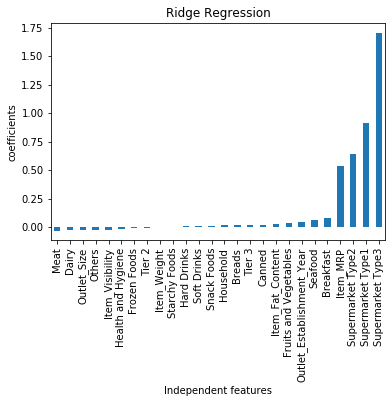

In [61]:
coef = pd.Series(ridge.coef_,predictors).sort_values()
coef.plot(kind='bar',title='Ridge Regression')
plt.xlabel("Independent features")
plt.ylabel("coefficients")

### Lasso Regression

In [62]:
from sklearn.linear_model import Lasso

In [63]:
lasso = Lasso(alpha=0.01,normalize=True).fit(X_train,Y_train)
Y_pred_lasso = lasso.predict(X_test)

In [64]:
print("Lasso coefficient: ",lasso.coef_)
print("\nLasso intercept: ",lasso.intercept_)

Lasso coefficient:  [ 0.  0. -0.  0. -0. -0.  0.  0.  0. -0. -0.  0.  0. -0.  0. -0. -0.  0.
  0. -0.  0.  0.  0.  0. -0.  0.]

Lasso intercept:  -0.010522008923628905


In [65]:
rmse_lasso = np.sqrt(mean_squared_error(Y_test,Y_pred_lasso))
r2_lasso = r2_score(Y_test,Y_pred_lasso)
print("RMSE Lasso: ",rmse_lasso,"\nr2 Lasso: ",r2_lasso)

RMSE Lasso:  1.0235659311500818 
r2 Lasso:  -0.001693239766812793


In [66]:
df1 = pd.DataFrame(columns=['Linear Regression','Ridge Regression','Lasso Regression'])
for i in range(len(lasso.coef_)):
    df1 = df1.append({'Linear Reg':reg.coef_[i]},{"Ridge Reg":ridge.coef_[i]},{"Lasso Reg":lasso.coef_[i]})


Text(0, 0.5, 'coefficients')

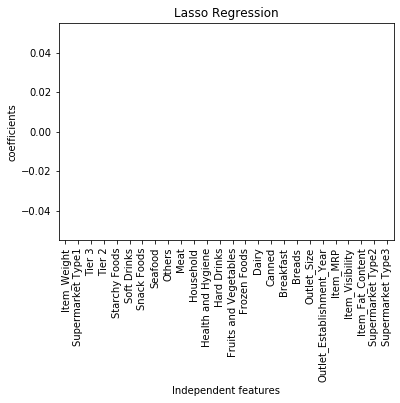

In [67]:
coef = pd.Series(lasso.coef_,predictors).sort_values()
coef.plot(kind='bar',title='Lasso Regression')
plt.xlabel("Independent features")
plt.ylabel("coefficients")

### Although we obtain low RMSE error, let us explore the dataset further to see if our model is the best model

In [68]:
sales_df_temp = X

In [69]:
sales_df_temp['Item_sales']=Y

In [70]:
sales_df_temp

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Breads,Breakfast,Canned,Dairy,...,Seafood,Snack Foods,Soft Drinks,Starchy Foods,Tier 2,Tier 3,Supermarket Type1,Supermarket Type2,Supermarket Type3,Item_sales
0,-0.769598,0,-1.111258,1.746938,0.138865,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0.910654
1,-1.497133,1,-1.044950,-1.489096,1.333806,1,0,0,0,0,...,0,0,1,0,0,1,0,1,0,-1.018375
2,0.995427,0,-1.096630,0.009762,0.138865,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,-0.049179
3,1.361347,1,-0.083776,0.659682,0.019371,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,-0.849039
4,-0.849240,0,-0.083776,-1.399305,-1.295064,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,-0.695309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,-1.293725,0,-0.275234,1.180344,-1.295064,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,-0.829530
8519,-0.967626,1,-0.476378,-0.527506,0.497347,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,NaN
8520,-0.489777,0,-0.718470,-0.897362,0.736336,2,0,0,0,0,...,0,0,0,0,1,0,1,0,0,NaN
8521,-1.219465,1,1.539759,-0.608170,1.333806,1,0,0,0,0,...,0,1,0,0,0,1,0,1,0,NaN


In [71]:
sales_df_temp.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Breads                       0
Breakfast                    0
Canned                       0
Dairy                        0
Frozen Foods                 0
Fruits and Vegetables        0
Hard Drinks                  0
Health and Hygiene           0
Household                    0
Meat                         0
Others                       0
Seafood                      0
Snack Foods                  0
Soft Drinks                  0
Starchy Foods                0
Tier 2                       0
Tier 3                       0
Supermarket Type1            0
Supermarket Type2            0
Supermarket Type3            0
Item_sales                   4
dtype: int64

In [72]:
sales_df_temp = sales_df_temp.dropna()

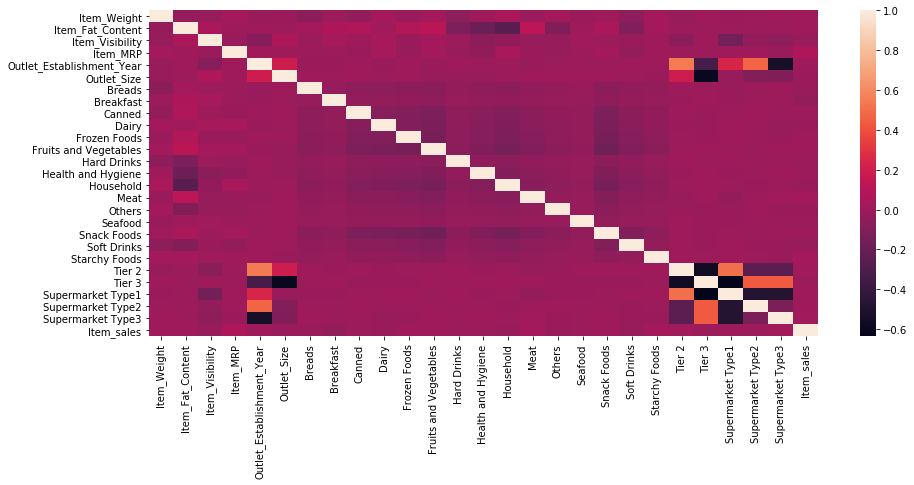

In [73]:
fig, ax = plt.subplots(figsize=(15,6))
sns.heatmap(sales_df_temp.corr())

In [74]:
sales_df_temp.corr(method='pearson')['Item_sales']

Item_Weight                  0.007462
Item_Fat_Content             0.008512
Item_Visibility             -0.012741
Item_MRP                     0.064391
Outlet_Establishment_Year    0.012651
Outlet_Size                 -0.005691
Breads                      -0.006611
Breakfast                   -0.029168
Canned                      -0.002207
Dairy                       -0.006010
Frozen Foods                 0.003656
Fruits and Vegetables        0.011514
Hard Drinks                  0.000775
Health and Hygiene          -0.002181
Household                   -0.010162
Meat                         0.022691
Others                      -0.004989
Seafood                      0.002060
Snack Foods                  0.011493
Soft Drinks                 -0.013383
Starchy Foods                0.025257
Tier 2                       0.015774
Tier 3                      -0.000615
Supermarket Type1            0.014292
Supermarket Type2            0.007575
Supermarket Type3            0.018194
Item_sales  

#### As Item types takes almost 50% of the independent variable, let us eliminate that column to check the accuracy 

In [75]:
X_temp = sales_df_temp.drop(sales_df_temp.iloc[:,6:21],axis=1)

In [76]:
X_temp = X_temp.drop(['Item_sales'],axis=1)

In [77]:
Y_temp = sales_df_temp["Item_sales"]

In [78]:
from sklearn.model_selection import train_test_split as tts
X_train_temp,X_test_temp,Y_train_temp,Y_test_temp = tts(X_temp,Y_temp,test_size = 0.25, random_state=0)

In [79]:
from sklearn.linear_model import LinearRegression
reg_temp = LinearRegression().fit(X_train_temp,Y_train_temp)

In [80]:
Y_pred_temp = reg_temp.predict(X_test_temp)

In [81]:
from sklearn.metrics import mean_squared_error, r2_score
rmse = np.sqrt(mean_squared_error(Y_test_temp, Y_pred_temp))
r2 = r2_score(Y_test, Y_pred)

In [82]:
print("RMSE: ",rmse,"\nR2 score: ",r2)

RMSE:  1.0059447409472886 
R2 score:  0.5641181377273178


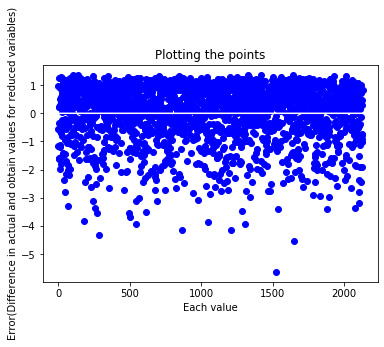

In [83]:
x = [i for i in range(1,len(Y_pred_temp)+1)]

X_plot = plt.scatter(x,(Y_pred_temp-Y_test_temp),c='blue')
plt.plot(x,[0]*len(Y_pred_temp),c='white')
plt.xlabel("Each value")
plt.ylabel("Error(Difference in actual and obtain values for reduced variables)")
plt.title("Plotting the points")
plt.show()

### As we can see, the RMSE increased drastically after removing the different Item types. Let us build the lasso and ridge regression models for this minimized data

### Ridge Regression

In [84]:
from sklearn.linear_model import Ridge
ridge_temp = Ridge(alpha=0.05, normalize=True).fit(X_train_temp,Y_train_temp)

In [85]:
Y_pred_ridge_temp = ridge_temp.predict(X_test_temp)

In [86]:
print("Ridge coefficient: ",ridge_temp.coef_)
print("\nRidge intercept: ",ridge_temp.intercept_)

Ridge coefficient:  [ 0.00176332  0.01023219 -0.00274929  0.05439159  0.01243358  0.00289184
  0.01846446 -0.00248545  0.11518566  0.11973783  0.15224558]

Ridge intercept:  -0.11522826711556683


In [87]:
rmse_ridge_temp = np.sqrt(mean_squared_error(Y_test_temp,Y_pred_ridge_temp))
r2_ridge_temp = r2_score(Y_test_temp,Y_pred_ridge_temp)
print("RMSE Ridge: ",rmse_ridge_temp,"\nr2_ridge: ",r2_ridge_temp)

RMSE Ridge:  1.0058062911512964 
r2_ridge:  0.005431409209763038


### Lasso Regression

In [88]:
from sklearn.linear_model import Lasso
lasso_temp = Ridge(alpha=0.01, normalize=True).fit(X_train_temp,Y_train_temp)

In [89]:
Y_pred_lasso_temp = lasso_temp.predict(X_test_temp)

In [90]:
print("Lasso coefficient: ",lasso_temp.coef_)
print("\nLasso intercept: ",lasso_temp.intercept_)

Lasso coefficient:  [ 0.00188686  0.01029771 -0.00082221  0.05659609  0.00920258  0.00728742
  0.01933029 -0.00082064  0.13868972  0.14920725  0.17386841]

Lasso intercept:  -0.1423024138152816


In [91]:
rmse_lasso_temp = np.sqrt(mean_squared_error(Y_test_temp,Y_pred_lasso_temp))
r2_lasso_temp = r2_score(Y_test_temp,Y_pred_lasso_temp)
print("RMSE Lasso: ",rmse_lasso_temp,"\nr2_Lasso: ",r2_lasso_temp)

RMSE Lasso:  1.005900218355028 
r2_Lasso:  0.005245644993832399


### It is evident that reducing the variables has made the model worse because r2 score has decreased for Ridge and Lasso.

### Along with Linear Regression, let us also build an SVM model to compare accuracies

#### On original data without removing Item Types

In [92]:
from sklearn.svm import SVR

In [93]:
reg_svr = SVR(kernel='linear').fit(X_train,Y_train)

In [94]:
Y_pred_svm = reg_svr.predict(X_test)

In [95]:
from sklearn.metrics import mean_squared_error, r2_score
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred_svm))
r2 = r2_score(Y_test, Y_pred_svm)

In [96]:
print("RMSE: ",rmse,"\nR2 score: ",r2)

RMSE:  0.6861358035939253 
R2 score:  0.5498852315672538


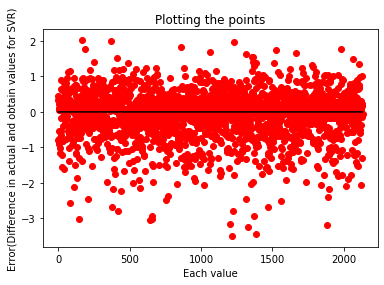

In [97]:
x = [i for i in range(1,len(Y_pred_svm)+1)]

X_plot = plt.scatter(x,(Y_pred_svm-Y_test),c='red')
plt.plot(x,[0]*len(Y_pred_svm),c='black')
plt.xlabel("Each value")
plt.ylabel("Error(Difference in actual and obtain values for SVR)")
plt.title("Plotting the points")
plt.show()

#### On data after removing Item Types

In [98]:
reg_svr_temp = SVR(kernel='linear').fit(X_train_temp,Y_train_temp)

In [99]:
Y_pred_temp_svm = reg_svr_temp.predict(X_test_temp)

In [100]:
from sklearn.metrics import mean_squared_error, r2_score
rmse = np.sqrt(mean_squared_error(Y_test_temp, Y_pred_temp_svm))
r2 = r2_score(Y_test_temp, Y_pred_temp_svm)

print("RMSE: ",rmse,"\nR2 score: ",r2)

RMSE:  1.02785851422996 
R2 score:  -0.038658356824676554


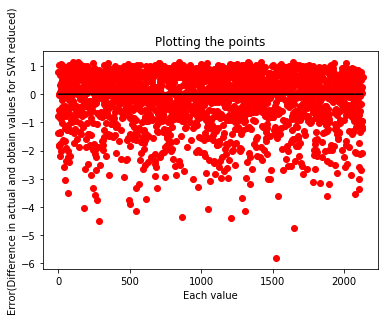

In [101]:
x = [i for i in range(1,len(Y_pred_temp_svm)+1)]

X_plot = plt.scatter(x,(Y_pred_temp_svm-Y_test_temp),c='red')
plt.plot(x,[0]*len(Y_pred_temp_svm),c='black')
plt.xlabel("Each value")
plt.ylabel("Error(Difference in actual and obtain values for SVR reduced)")
plt.title("Plotting the points")
plt.show()

### When compared to our Linear Regression model, our SVR model is slightly inferior

### Let us now import the test set and use our regressor and SVR to predict the prices

In [102]:
sales_df_test = pd.read_csv("Test.csv")

In [103]:
sales_df_test.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
5,FDH56,9.800,Regular,0.063817,Fruits and Vegetables,117.1492,OUT046,1997,Small,Tier 1,Supermarket Type1
6,FDL48,19.350,Regular,0.082602,Baking Goods,50.1034,OUT018,2009,Medium,Tier 3,Supermarket Type2
7,FDC48,NaN,Low Fat,0.015782,Baking Goods,81.0592,OUT027,1985,Medium,Tier 3,Supermarket Type3
8,FDN33,6.305,Regular,0.123365,Snack Foods,95.7436,OUT045,2002,NaN,Tier 2,Supermarket Type1
9,FDA36,5.985,Low Fat,0.005698,Baking Goods,186.8924,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [104]:
sales_df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [105]:
sales_df_test['Item_Fat_Content'].unique()

array(['Low Fat', 'reg', 'Regular', 'LF', 'low fat'], dtype=object)

In [106]:
replaced_values={'low fat':'Low Fat','reg':'Regular','LF':'Low Fat'}
sales_df_test['Item_Fat_Content'] = sales_df_test['Item_Fat_Content'].replace(replaced_values) 

### Filling the missing values

In [107]:
sales_df_test['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [108]:
sales_df_test["Item_Weight"] = sales_df_test["Item_Weight"].fillna(sales_df_test.groupby(['Item_Identifier','Item_Fat_Content','Item_Type'])['Item_Weight'].transform('mean'))

In [109]:
sales_df_test["Outlet_Size"].fillna(sales_df_test["Outlet_Size"].mode()[0],inplace=True)

In [110]:
sales_df_test.isnull().sum()

Item_Identifier               0
Item_Weight                  20
Item_Fat_Content              0
Item_Visibility               0
Item_Type                     0
Item_MRP                      0
Outlet_Identifier             0
Outlet_Establishment_Year     0
Outlet_Size                   0
Outlet_Location_Type          0
Outlet_Type                   0
dtype: int64

In [111]:
sales_df_test = sales_df_test.dropna()

### Scaling the data

In [112]:
# Let us start with our Outlet_Size variable and Item_Fat_Content. Being ordinal is nature, we can use one Label Encoding
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
labelencoder = LabelEncoder()
sales_df_test["Outlet_Size"] = labelencoder.fit_transform(sales_df_test["Outlet_Size"])
sales_df_test["Item_Fat_Content"] = labelencoder.fit_transform(sales_df_test["Item_Fat_Content"])

In [113]:
sales_columns = ['Item_Type','Outlet_Location_Type','Outlet_Type']

# Let us now consider nominal data such as Item_Type, Outlet_Location_Type, and Outlet_Type
for feature in sales_columns:
    sales_df_temp = sales_df_test[feature]
    sales_df_temp = pd.get_dummies(sales_df_temp,columns=[feature],drop_first=True)
    sales_df_test = sales_df_test.join(sales_df_temp)

In [114]:
sales_df_test = sales_df_test.drop(['Item_Type','Outlet_Location_Type','Outlet_Type','Item_Identifier','Outlet_Identifier'],axis=1)
sales_df_test

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Breads,Breakfast,Canned,Dairy,...,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods,Tier 2,Tier 3,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,20.750,0,0.007565,107.8622,1999,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1,8.300,1,0.038428,87.3198,2007,1,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
2,14.600,0,0.099575,241.7538,1998,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,7.315,0,0.015388,155.0340,2007,1,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
4,13.600,1,0.118599,234.2300,1985,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,10.500,1,0.013496,141.3154,1997,2,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
5677,7.600,1,0.142991,169.1448,2009,1,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
5678,10.000,0,0.073529,118.7440,2002,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
5679,15.300,1,0.000000,214.6218,2007,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0


In [115]:
sales_df_test['Item_Visibility'] = sales_df_test["Item_Visibility"].replace({0:np.mean(sales_df_test["Item_Visibility"])}) 
sales_df_test['Item_Visibility']

0       0.007565
1       0.038428
2       0.099575
3       0.015388
4       0.118599
          ...   
5676    0.013496
5677    0.142991
5678    0.073529
5679    0.065697
5680    0.104720
Name: Item_Visibility, Length: 5661, dtype: float64

In [116]:
from sklearn.preprocessing import StandardScaler
scaler_test_X = StandardScaler()

In [117]:
sales_df_test.iloc[:,[0,3,4]] = scaler_test_X.fit_transform(sales_df_test.iloc[:,[0,3,4]])

### Given our test data, let us make two predictions:
- With the entire data 
- With the reduced features

In [118]:
Y_predicted_test = reg.predict(sales_df_test)

#### Our values are in decimals because we have scaled the data earlier. On reversing this process, we can achieve the real sales output

In [119]:
Y_predicted_test = Y_predicted_test*np.std(sales_df['Item_Sales']) + np.mean(sales_df['Item_Sales'])

In [120]:
Y_predicted_test

array([1778.21656075, 1447.42909962, 1891.67586672, ..., 1901.99769739,
       3495.65654183, 1395.44501349])

### Repeating the same process with reduced features

In [121]:
sales_df_reduced = sales_df_test.drop(sales_df_test.iloc[:,6:21],axis=1)

In [122]:
Y_predicted_test_reduced = reg_temp.predict(sales_df_reduced)

In [123]:
Y_predicted_test_reduced = Y_predicted_test_reduced*np.std(sales_df['Item_Sales']) + np.mean(sales_df['Item_Sales'])

In [124]:
Y_predicted_test_reduced

array([2142.75640648, 2165.95001527, 2098.40324262, ..., 2191.330423  ,
       2372.09740868, 2146.97598741])

### Let us repeat the above process for our SVM regressor

#### Making a prediction on the whole data

In [125]:
Y_predicted_test_svm = reg_svr.predict(sales_df_test)

In [126]:
Y_predicted_test_svm = Y_predicted_test_svm*np.std(sales_df['Item_Sales']) + np.mean(sales_df['Item_Sales'])

In [127]:
Y_predicted_test_svm

array([1708.08764459, 1385.16286679, 1834.78969674, ..., 1887.68184815,
       3293.06125337, 1352.04785172])

#### Making a prediction on the reduced data

In [128]:
Y_predicted_test_svm_reduced = reg_svr_temp.predict(sales_df_reduced)

In [129]:
Y_predicted_test_svm_reduced = Y_predicted_test_svm_reduced*np.std(sales_df['Item_Sales']) + np.mean(sales_df['Item_Sales'])

In [130]:
Y_predicted_test_svm_reduced

array([1802.13446517, 1771.98201677, 1772.56322444, ..., 1815.40531329,
       1995.05903218, 1731.8393627 ])

## In conclusion, there were 4 models trained:
1) Linear Regression with all variables<br>
2) Linear Regression without Item Types<br>
3) Support Vector Regression with linear kernel - All Variables<br>
4) Support Vector Regression with linear kernel - without  Item Types<br>

- It is evident that after removing Item Types, our model has performed worse.
- Therefore, all variables are barring a few variables such as Item_Identifier and Outlet_Identifier, are required for our model.
- The linear regression model has slightly performed better than the SVR model and Ridge model. It is the best model